# Problem Statement:
Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data=pd.read_csv('japan_used_cars_datasets.csv')

In [3]:
#Checking the overview of the column
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
#checking the shape
data.shape

(2318, 11)

There are about 2318 rows and 11 columns in the datasets

In [5]:
#Checking for columns
data.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

There are 11 columns in the dataset. id gives ths info about serial numbers, price gives the info about the sale price of the vehicle, mark is The brand of car, model is model of the vehicle, year is The vehicle registration year, mileage is miles traveled by vehicle, enngine capacity is The measurement of the total volume of the cylinders in the engine, transmission The type of gearbox used by the car, drive is wheel drive(2wd, 4wd and awd), Hand drive is Left-hand traffic (LHT) and right-hand traffic (RHT) and fuel is The type of fuel used by the car( gasoline, diesel, hybrid, lpg and cng).

In [6]:
#Checking for null values
data.isna().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

Null values are not prsent in the dataset

In [7]:
#Checking for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


Columns id,price,year,mileage and engine capacity has integer type of data.
while columns mark,model,transmission,drive,hand drive and fuel has object type of data(string).

In [8]:
#Checking for duplicates
data.drop_duplicates(inplace=True)
data.shape

(2318, 11)

Since the number of rows are same, there are no duplicates present in the dataset

In [9]:
#Description of dataset
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [10]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


# Since the year is given i would like to know how many years have past for the particular grom the date of registration till data.So i am addiing one more column current year so that i will get the number of years for a particular car

In [11]:
#Adding current year column to the dataset
data['current_year']=2022
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,current_year
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,2022
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,2022
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,2022
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,2022
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,2022


In [12]:
#checking difference betweeen the current year and year of registration so that i would get the number of years and adding number of years to the dataset
data['no_of_years']=data['current_year']-data['year']

In [13]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,current_year,no_of_years
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,2022,19
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,2022,12
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,2022,17
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,2022,14
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,2022,16


So we can see that number of years column has been added to the dataset and we have got number of years.
Note:Number of years meaning how many years has been past for the car from the year of registration.

In [14]:
#since we got the no_of_years dropping current year and year column
data=data.drop(['year','current_year'],axis=1)

In [15]:
data.head()

,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
0,0,80,nissan,march,80000,1240,at,2wd,rhd,gasoline,19
1,1,110,nissan,march,53000,1200,at,2wd,rhd,gasoline,12
2,2,165,nissan,lafesta,47690,2000,at,2wd,rhd,gasoline,17
3,3,190,toyota,avensis,130661,1990,at,2wd,rhd,gasoline,14
4,4,190,daihatsu,mira,66300,660,at,2wd,rhd,gasoline,16


Year and current year column have been dropped.

In [16]:
#Checking unique values
data['mark'].unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

In [17]:
#Checking number of unique values
data['mark'].nunique()

28

There are about 28 diffrent brand of car present in the dataset

In [18]:
#Checking unique values
data['model'].unique()

array(['march', 'lafesta', 'avensis', 'mira', 'passat', 'bongo van',
       'step wgn', 'sambar', 'inspire', 'mercedes-benz others', 'note',
       'passo', 'impreza', 'kubota others', 'life', 'progres',
       'cube cubic', 'cube', 'a-class', 'coltplus', 'mr wagon',
       'pajero mini', 'fit', 'legacy b4', 'vitz', 'mark ii blit',
       'insight', 'move', 'tanto', 'terios kid', 'az-wagon', 'coo',
       'verisa', 'swift', 'delica d2', 'tiida', 'sienta', 'mini', 'colt',
       'platz', 'bluebird sylphy', 'eclipse', 'bb', 'moco',
       'clipper truck', 'esse', 'ek wagon', 'polo', 'x-trail',
       'atenza sport', 'ad van', 'pixis space', 'freed spike', 'stream',
       'alto', 'raum', 'wish', 'every', 'demio', 'jimny', 'premacy',
       'cr-v', 'lapin', 'delica', 'wagon r', 'lancer', 'naked', 'odyssey',
       'ractis', 'porte', 'corolla rumion', 'tiida latio', 'voxy',
       'carol', 'sunny', 'bongo truck', 'boon', 's-mx', 'pt cruiser',
       'golf', 'ad expert', 'fit hybrid', 'sere

In [19]:
#Checking number unique values
data['model'].nunique()

258

There are about 258 diffrent model of the vehicles are there in the dataset

In [20]:
#Checking number unique values
data['mileage'].unique()

array([ 80000,  53000,  47690, ..., 111670, 101874,  72320], dtype=int64)

In [21]:
#Checking number unique values
data['mileage'].nunique()

1367

There are about 1367 different miles traveled by vehicle are there in the dataset

In [22]:
#Checking unique values
data['engine_capacity'].unique()

array([ 1240,  1200,  2000,  1990,   660,  3190,  1800,   650,  2490,
        2030,  1500,  1000,     9,   990,  2390,  1700,  1290,  2990,
        1980,  1300,  1330,  1600,  2970,  1400,  1430,  2320,  1790,
        1490,  1460,  1320,  2400,  1380,  2200,  3000,  2300,  1296,
        1496,  1297,  2500,   690,  3500,  2190,  2450,  1590,  2499,
        1799,  1780,  3100,  2730,  1480,  3530,  1970,  1794,  3200,
        2260,  2350,  1190,  2180,  1660,  1991,   550,  1410,  1242,
        1498,  1986,   798,  1587,  1998,  1270,  2700,  2520,  2360,
        1997,  1830,  1762,  2480,  3470,  3690,  3490,  3160,  1340,
        2476,   996, 12340,  4500,  1390,  1599,  1493,  4890,  3050,
        2100,  2497,  1999], dtype=int64)

In [23]:
#Checking number of unique values
data['engine_capacity'].nunique()

93

There are about 93 different measurement of the total volume of the cylinders in the engine vehicles are present in the dataset

In [24]:
#Checking unique values
data['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

3 types of gearbox used by the car are present in the dataset

In [25]:
#Checking unique values
data['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

3 types of wheel drive present in the dataset meaning whether the vehicle is 2 wheel drive or 4 wheel drive or whether it is automatic.

In [26]:
#Checking unique values
data['hand_drive'].unique()

array(['rhd', 'center', 'lhd'], dtype=object)

3 types of hand drive present in the datset, menaing whether we can drive from left side or from right side or from center.

In [27]:
#Checking unique values
data['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In this dataset 4 types of fuel used car are there, they are gasoline,diesel,hybrid,lpg and cng

In [28]:
#Checking unique values
data['no_of_years'].unique()

array([19, 12, 17, 14, 16, 18, 20, 11, 15, 13, 43, 10, 24, 23, 21, 22,  9,
       40, 28, 25, 26, 27,  8, 32, 31, 29,  7, 30, 35, 34], dtype=int64)

In [29]:
#Checking number of unique values
data['no_of_years'].nunique()

30

There are about 30 different year category present in the dataset

In [30]:
#Checking for the count of unique values present in the dataset
data.mark.value_counts()

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64

In this dataset 1047 vehicles are of toyota brand followed by 382 of honda brand and least that is 1 each of hino,mitsuoka,ford,gm,citroen,opel,chrysler,kubota and jaguar brand

In [31]:
#Checking for the count of unique values present in the dataset
data.model.value_counts()

fit                    270
vitz                   179
passo                  127
ist                     93
ractis                  85
                      ... 
sx4 sedan                1
207                      1
corolla ii               1
impreza sportswagon      1
estima t                 1
Name: model, Length: 258, dtype: int64

In [32]:
#Checking for the count of unique values present in the dataset
data.mileage.value_counts()

112000    18
81000     17
68000     16
92000     16
94000     15
          ..
52600      1
157802     1
101977     1
147272     1
72320      1
Name: mileage, Length: 1367, dtype: int64

In [33]:
#Checking for the count of unique values present in the dataset
data.engine_capacity.value_counts()

1300    468
1500    433
2000    197
1000    168
660     159
       ... 
1986      1
798       1
1587      1
1270      1
1999      1
Name: engine_capacity, Length: 93, dtype: int64

In [34]:
#Checking for the count of unique values present in the dataset
data.transmission.value_counts()

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64

most of the vehicles have 'at' type of gearbox followed by mt and least of cvt.

In [35]:
#Checking for the count of unique values present in the dataset
data.drive.value_counts()

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64

Most vehicles are two wheel drive followed by 4 wheel drive and least are automatic.

In [36]:
#Checking for the count of unique values present in the dataset
data.hand_drive.value_counts()

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64

Most of the vehicles are right hand drive, very few are left hand drive and only one vehicle is centre drive.

In [37]:
#Checking for the count of unique values present in the dataset
data.fuel.value_counts()

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64

Most of the vehicle are using gasoline as fuel followed by diesel,lpg,hybrid and only one car uses cng as fuel.

In [38]:
#Checking for the count of unique values present in the dataset
data.no_of_years.value_counts()

17    365
15    318
19    248
16    199
13    199
18    194
11    173
12    153
14     91
20     82
21     77
9      52
10     42
23     32
22     27
24     13
25     13
26      6
27      6
29      5
28      4
8       4
32      4
31      3
30      3
43      1
40      1
7       1
35      1
34      1
Name: no_of_years, dtype: int64

Most of the vehicles were registered 17 years ago,latest vehicle was registered 7 years ago and oldest vehicle was registered 40 years ago. 

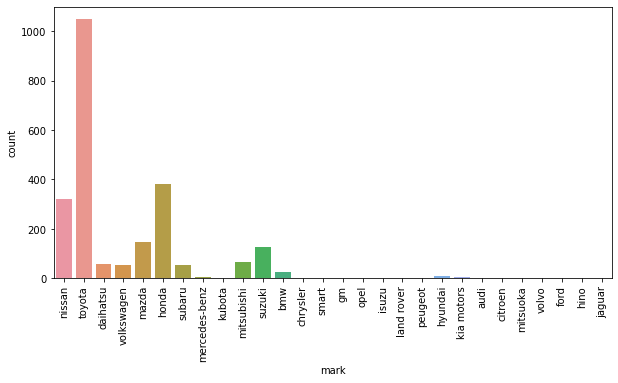

In [39]:
#Plotting count plot
plt.figure(figsize=(10,5))
sns.countplot(x='mark',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot we can observe that most of the vehicles which are there in the dataset are of brand Toyota, followed by Honda nad Nissan

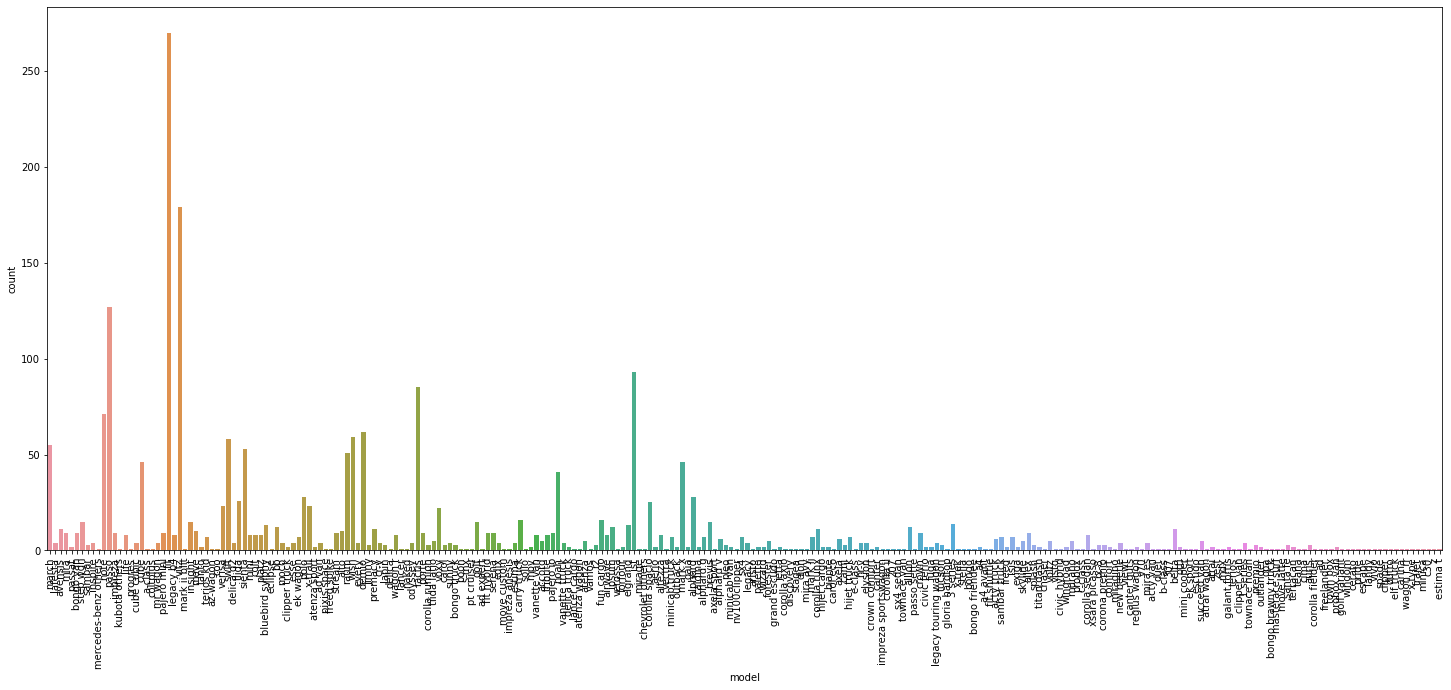

In [40]:
#Plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='model',data=data)
plt.xticks(rotation='vertical')
plt.show()

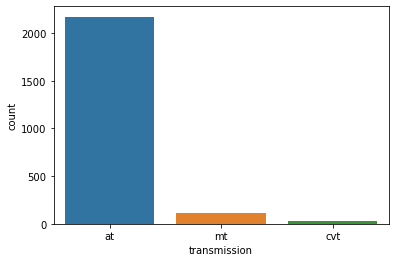

In [41]:
#Plotting count plot
sns.countplot(x='transmission',data=data)
plt.show()

We can observe by looking at the plot that most of the vehicles haev 'at' type of gearbox

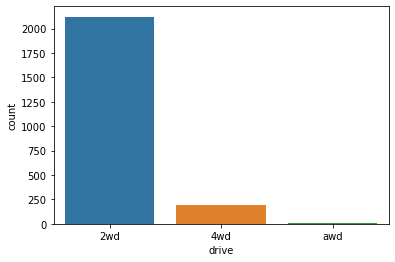

In [42]:
#Plotting count plot
sns.countplot(x='drive',data=data)
plt.show()

In this plot we can observe that most of the vehicles are 2 wheel drive.

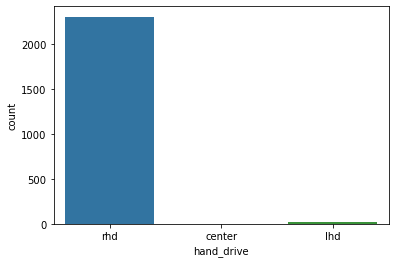

In [43]:
#Plotting count plot
sns.countplot(x='hand_drive',data=data)
plt.show()

So in this plot most of the vehicles are right hand drive.

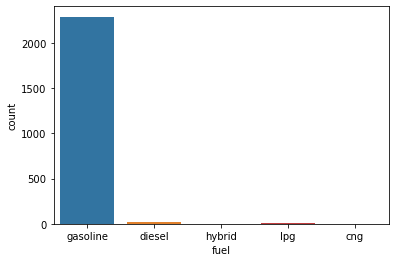

In [44]:
#Plotting count plot
sns.countplot(x='fuel',data=data)
plt.show()

By looking at the plot we can say that most of the vehicles uses gasoline as fuel.

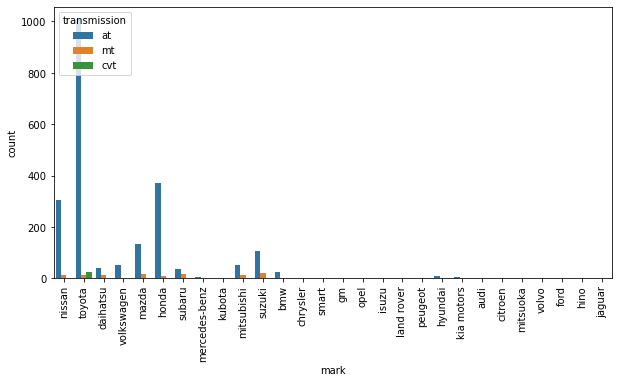

In [45]:
#Plotting count plot
plt.figure(figsize=(10,5))
sns.countplot(x='mark',hue='transmission',data=data)
plt.xticks(rotation='vertical')
plt.show()

So in this we can see that most of toyota vehicles hav 'at' type of gearbox same for nissan and honda vehicles.

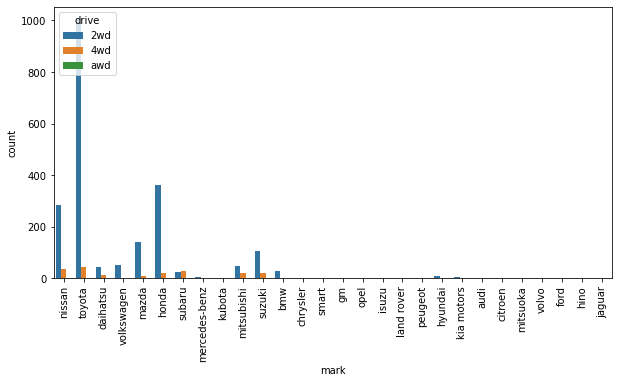

In [46]:
#Plotting count plot
plt.figure(figsize=(10,5))
sns.countplot(x='mark',hue='drive',data=data)
plt.xticks(rotation='vertical')
plt.show()

So in this plot we can see that most of the vehicle including toyota,honda and nissan most of them are 2wheel drive vehicles.

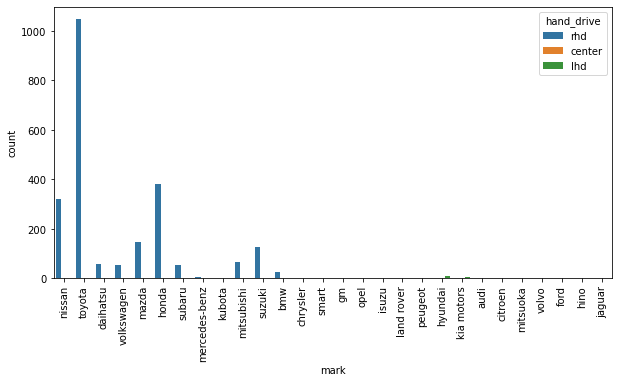

In [47]:
#Plotting count plot
plt.figure(figsize=(10,5))
sns.countplot(x='mark',hue='hand_drive',data=data)
plt.xticks(rotation='vertical')
plt.show()

By looking at the plot we can say that most of the vehicle are right hand drive

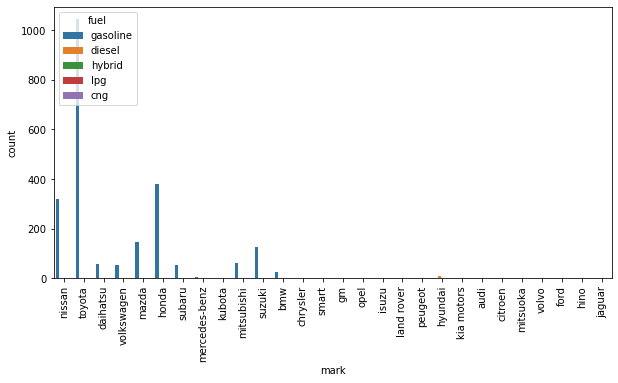

In [48]:
#Plotting count plot
plt.figure(figsize=(10,5))
sns.countplot(x='mark',hue='fuel',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot we can see that most of the vehicle uses gasoline as fuel.

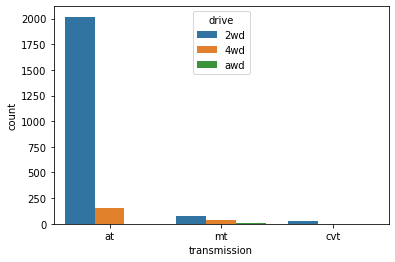

In [49]:
#Plotting count plot
sns.countplot(x='transmission',hue='drive',data=data)
plt.show()

By looking at the plot we can see that most of the vehicle who has 'at; type of gear box are 2 wheel drive.

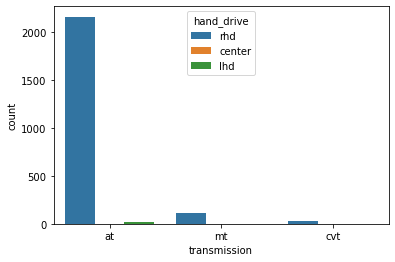

In [50]:
#Plotting count plot
sns.countplot(x='transmission',hue='hand_drive',data=data)
plt.show()

In this plot we can see that most of the vehicles who have right hadn side drive are having 'at' type of gear box

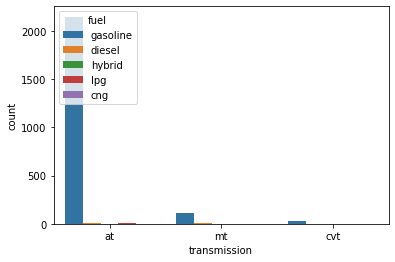

In [51]:
#Plotting count plot
sns.countplot(x='transmission',hue='fuel',data=data)
plt.show()

 Most of the vehicles who are using gasoline as fuel are having 'at' type of gear box

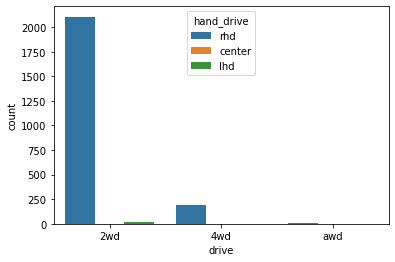

In [52]:
#Plotting count plot
sns.countplot(x='drive',hue='hand_drive',data=data)
plt.show()

Most of the vehicles which are 2 wheel drive are righ hand side drive vehicles.

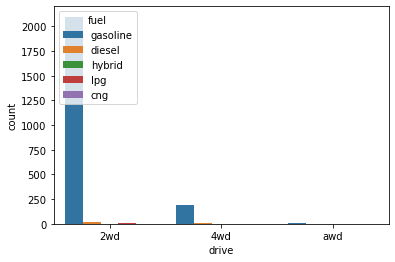

In [53]:
#Plotting count plot
sns.countplot(x='drive',hue='fuel',data=data)
plt.show()

Most of the vehicles who use gasolone as fuel  are 2 wheel drive vehicles.

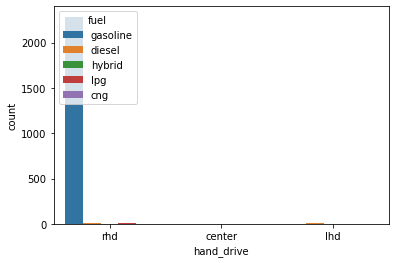

In [54]:
#Plotting count plot
sns.countplot(x='hand_drive',hue='fuel',data=data)
plt.show()

most of the which are right hand drive uses gasoline as fuel.

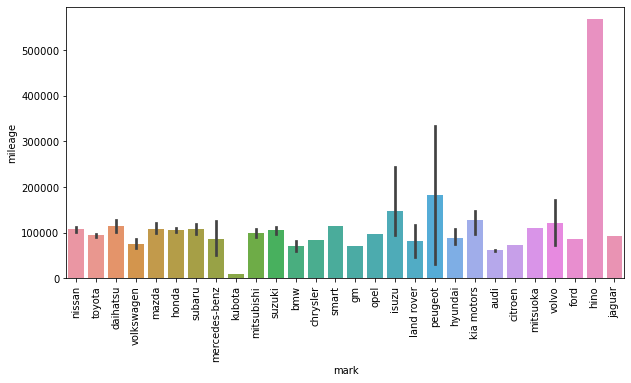

In [55]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='mileage',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see that car brand hino hav travelled more than 500000 miles.

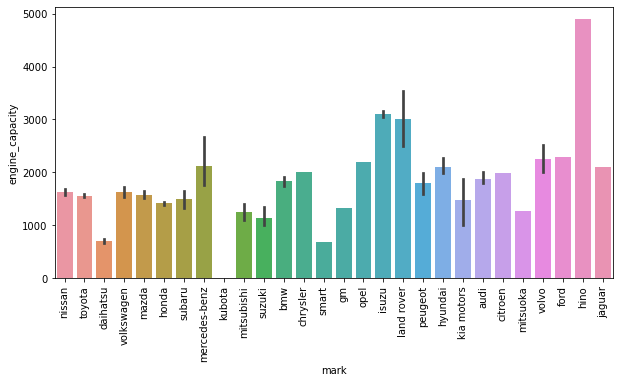

In [56]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='engine_capacity',data=data)
plt.xticks(rotation='vertical')
plt.show()

Also the we can see that car brand hino has the highest engine capacity that is more than 4500cc 

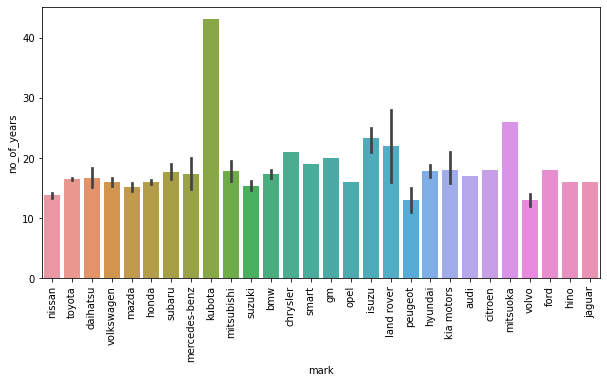

In [57]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='no_of_years',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot we can see that car brand kubota is oldest one with more tham 40 years.

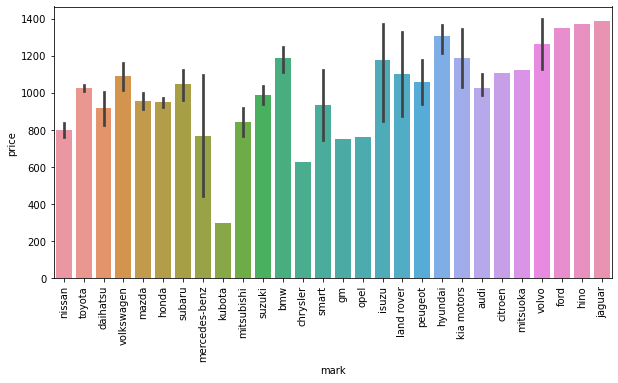

In [58]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see that car brand such as jaguar hino and ford and volvo have the highes price.

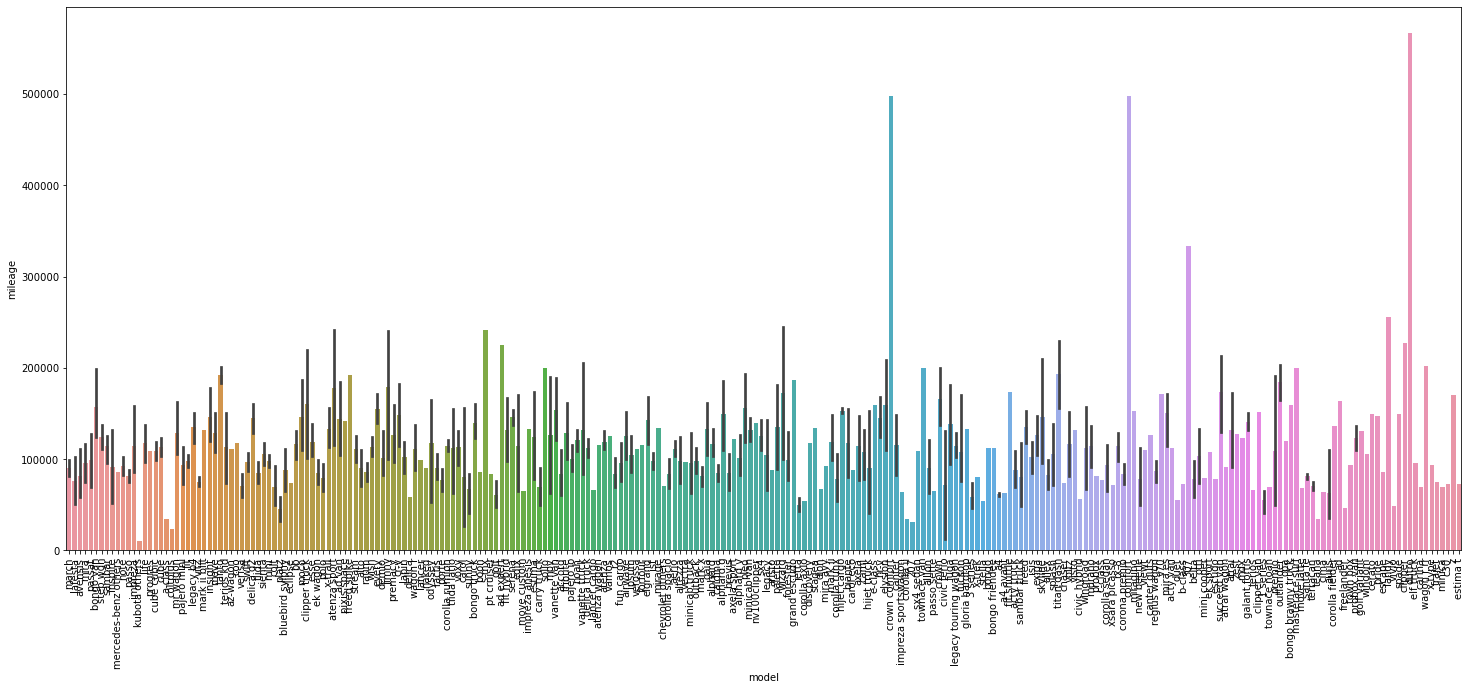

In [59]:
#Plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='model',y='mileage',data=data)
plt.xticks(rotation='vertical')
plt.show()

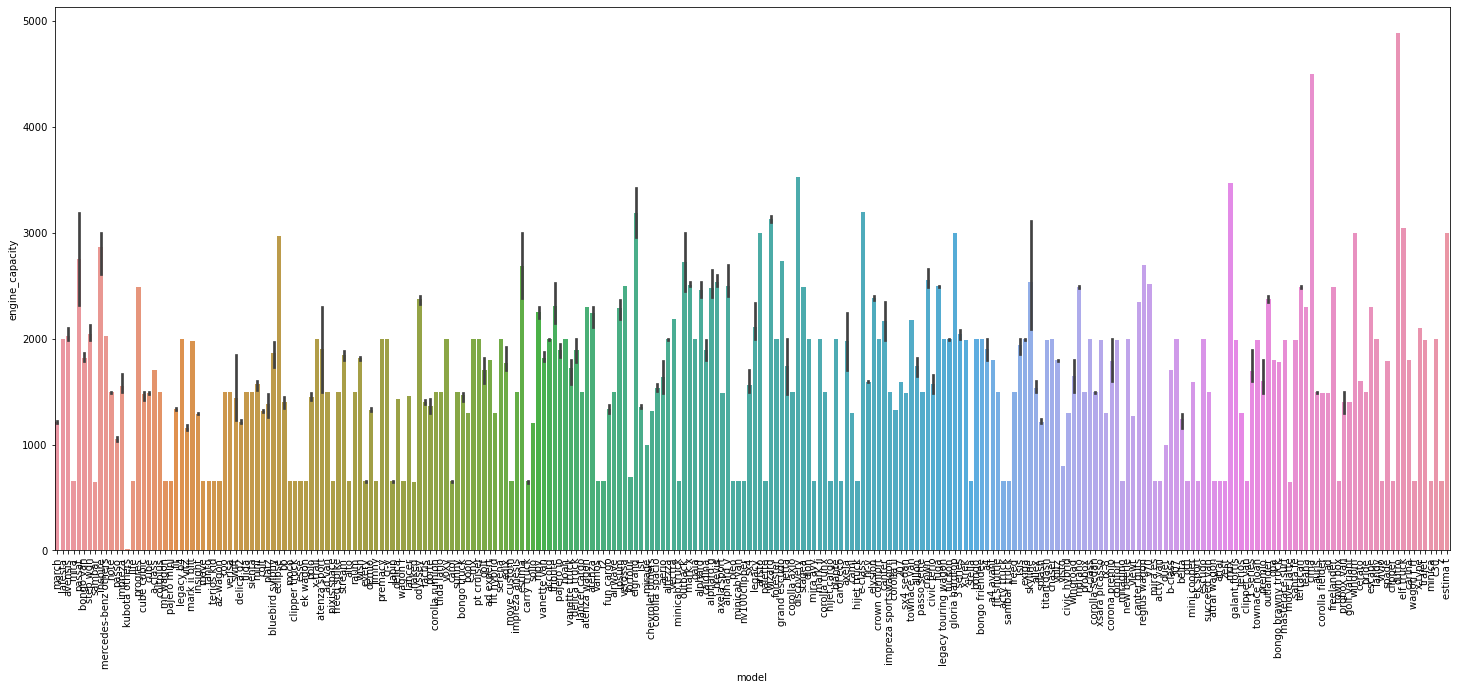

In [60]:
#Plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='model',y='engine_capacity',data=data)
plt.xticks(rotation='vertical')
plt.show()

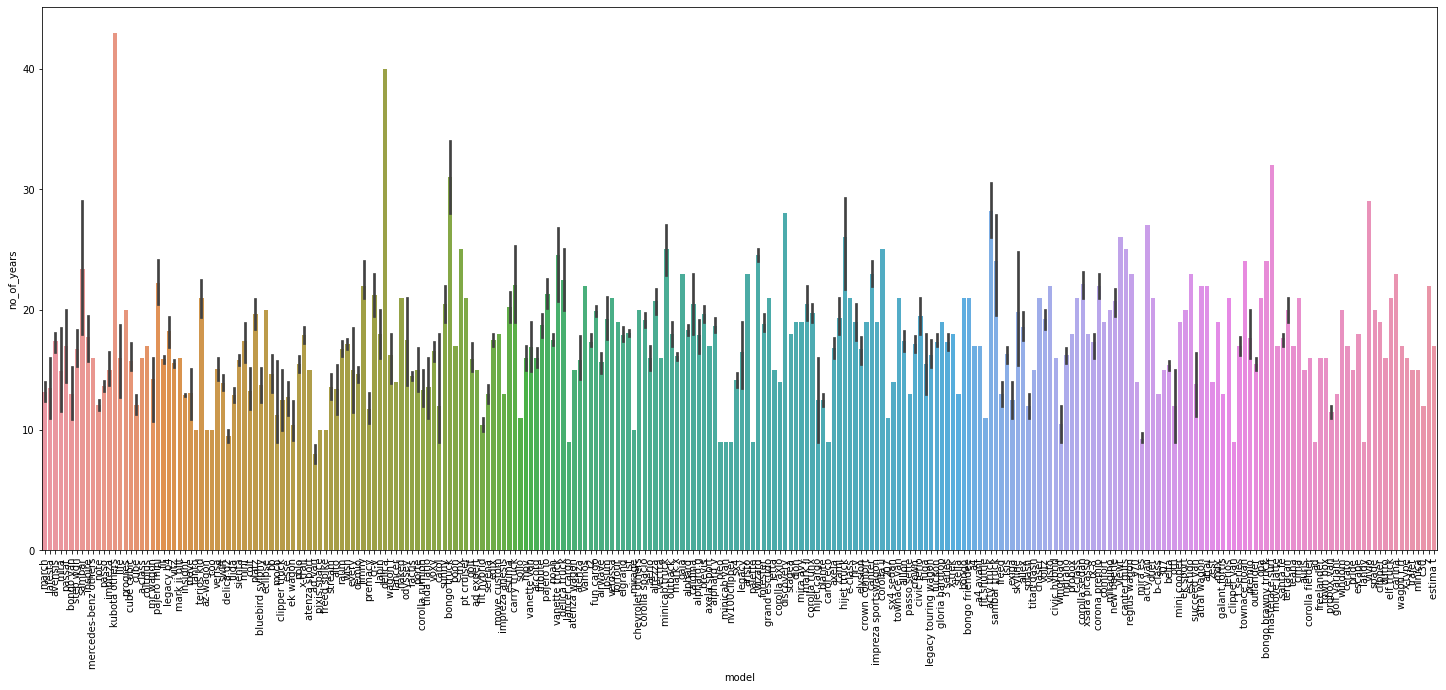

In [61]:
#Plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='model',y='no_of_years',data=data)
plt.xticks(rotation='vertical')
plt.show()

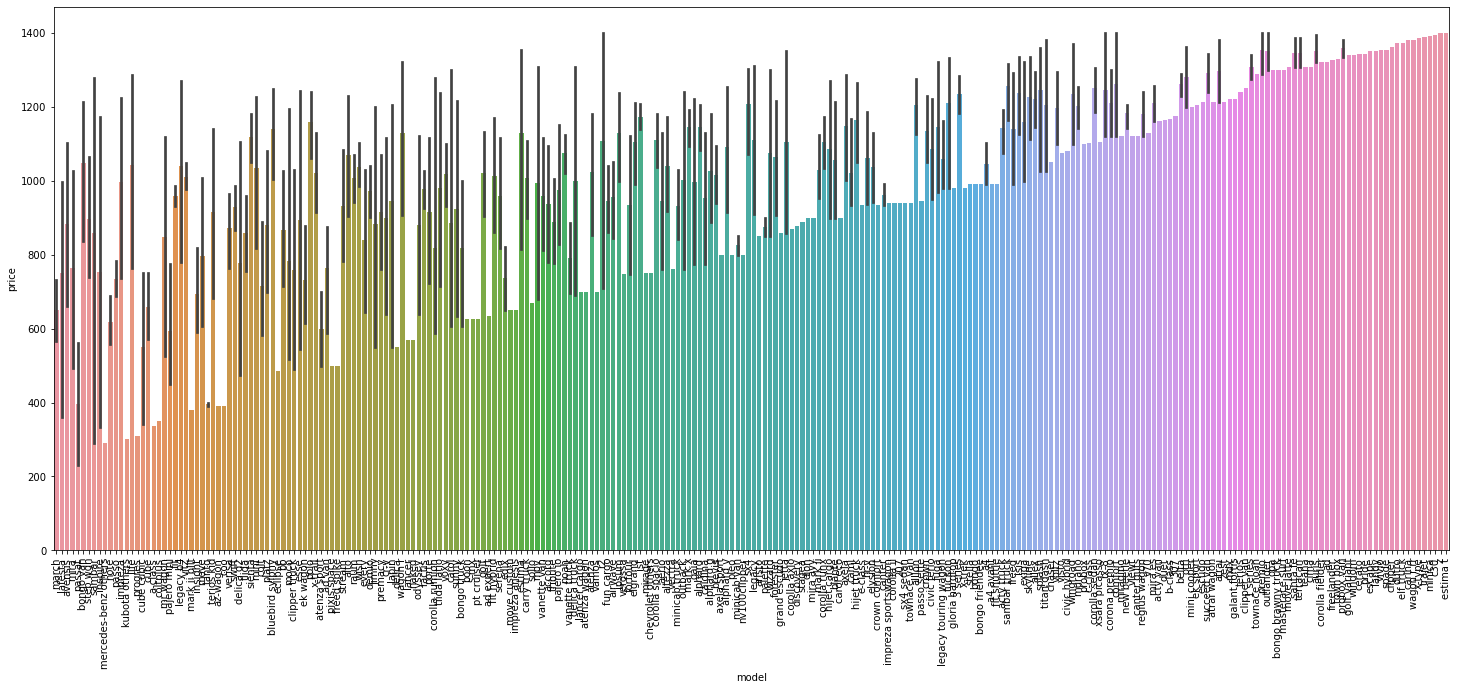

In [62]:
#Plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='model',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

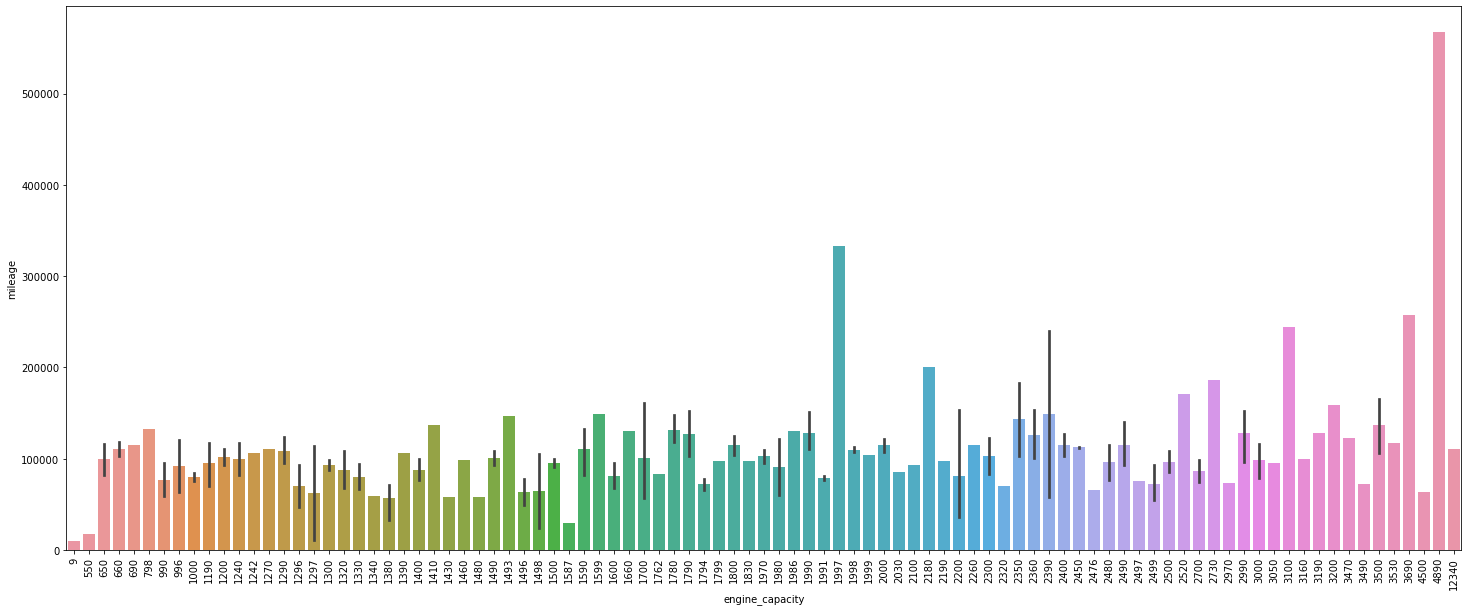

In [63]:
#Plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='engine_capacity',y='mileage',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see that the car having enigne capacity 4890cc have travelled more miles than others.

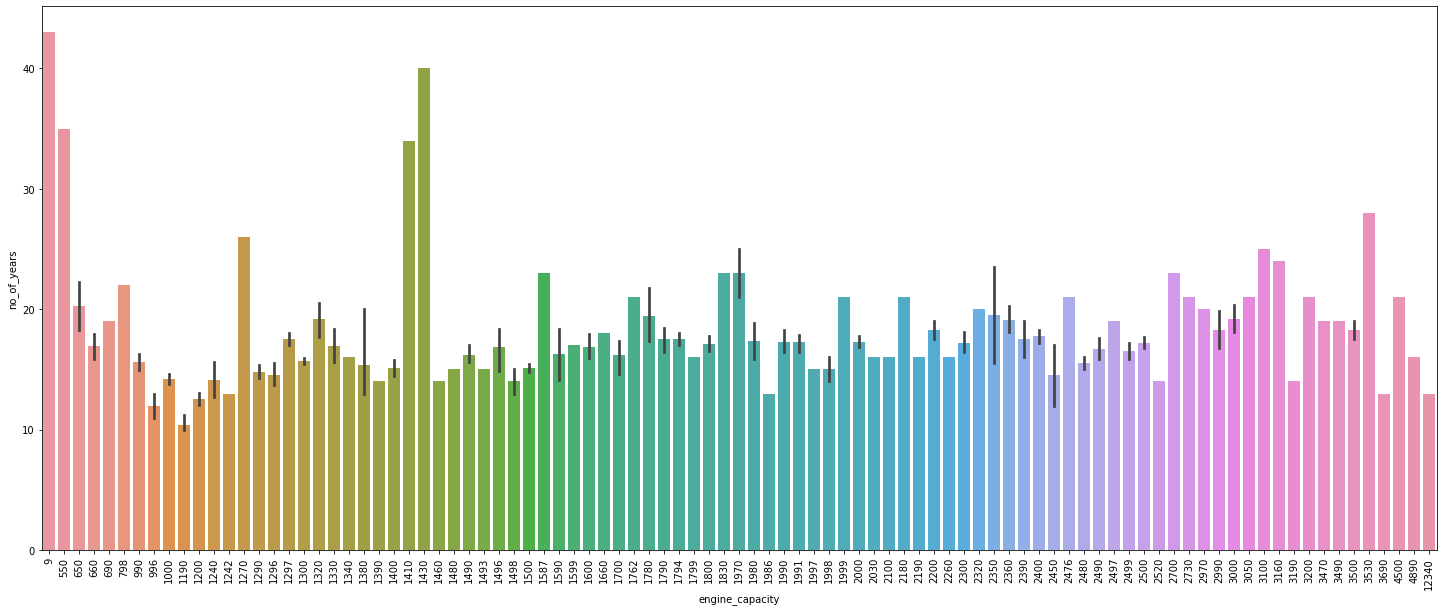

In [64]:
plt.figure(figsize=(25,10))
sns.barplot(x='engine_capacity',y='no_of_years',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see that vehicle having 9cc is older than 40 years.

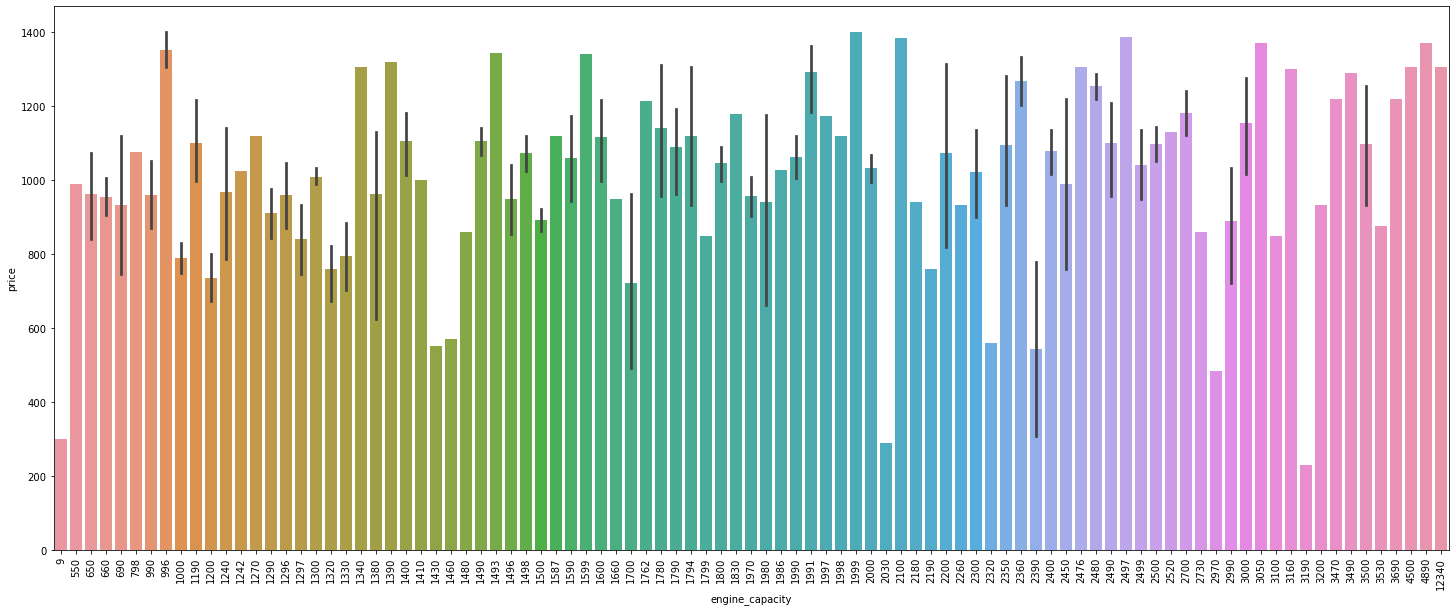

In [65]:
#Plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='engine_capacity',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see the pricing as compared with engine capacity of the vehicle.

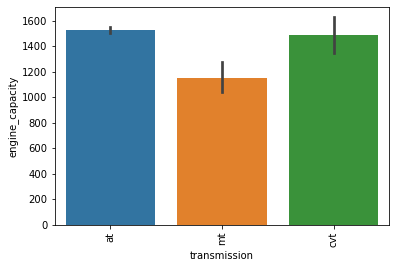

In [66]:
#Plotting bar plot
sns.barplot(x='transmission',y='engine_capacity',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see the vehicles which have 'at' type of gear box have the highest engine capacity which is more than 1400cc.

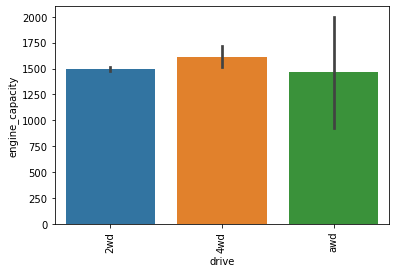

In [67]:
#Plotting bar plot
sns.barplot(x='drive',y='engine_capacity',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot we can see that the vehicle which are 4 wheel drive have highest the engine capacity which is more than 1500cc

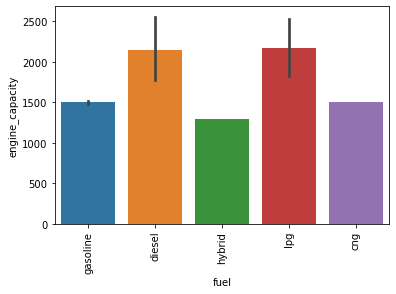

In [68]:
#Plotting bar plot
sns.barplot(x='fuel',y='engine_capacity',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot we can see that the vehicles which uses diesel and lpg as fuel have the highes engine capacity that is more than 2000cc

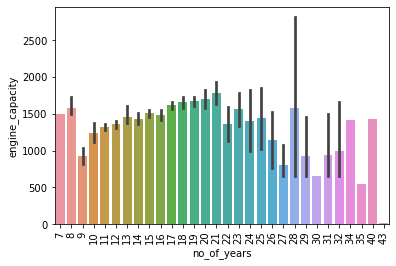

In [69]:
#Plotting bar plot
sns.barplot(x='no_of_years',y='engine_capacity',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot we can see that the engine capacity of a vehicle which is highest among all is 21 years old

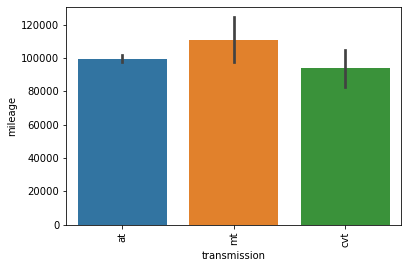

In [70]:
#Plotting bar plot
sns.barplot(x='transmission',y='mileage',data=data)
plt.xticks(rotation='vertical')
plt.show()

Vehicles with 'mt' type of gearbox vehicles have covered most of the miles compared to other type of gear box vehicles.

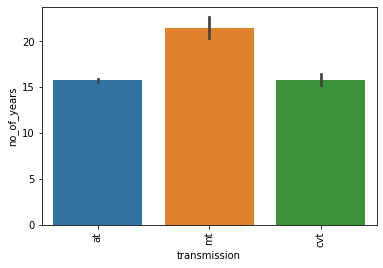

In [71]:
#Plotting bar plot
sns.barplot(x='transmission',y='no_of_years',data=data)
plt.xticks(rotation='vertical')
plt.show()

Most of the vehicles with 'mt' type of gear box are older than that of 'at' and 'cvt' type of gear box vehicles

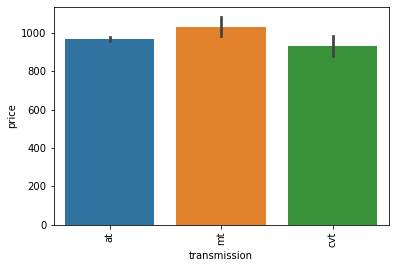

In [72]:
#Plotting bar plot
sns.barplot(x='transmission',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Vehicles with mt type of gearbox have the highest prices than of 'at' and 'cvt' type of gearbox vehicles.

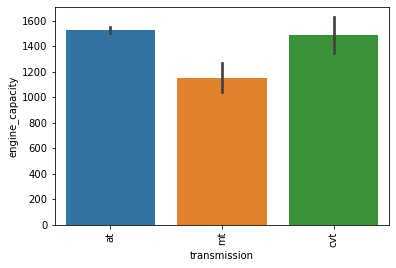

In [73]:
#Plotting bar plot
sns.barplot(x='transmission',y='engine_capacity',data=data)
plt.xticks(rotation='vertical')
plt.show()

vehicles with at type of gearbox have the highest engine capacity among others

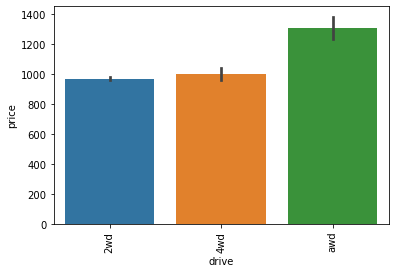

In [74]:
#Plotting bar plot
sns.barplot(x='drive',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Automatic drive vehicle has the highest price among others.

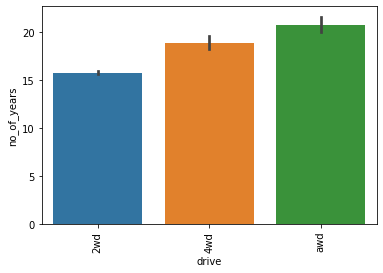

In [75]:
#Plotting bar plot
sns.barplot(x='drive',y='no_of_years',data=data)
plt.xticks(rotation='vertical')
plt.show()

Automatic drived vehicles are the oldest ones amongst others

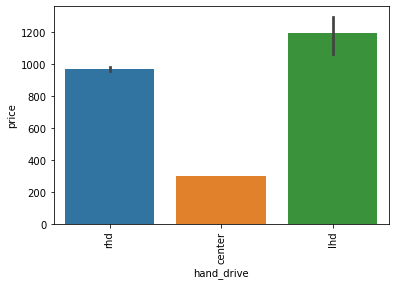

In [76]:
#Plotting bar plot
sns.barplot(x='hand_drive',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Left hand drive vehicles have the highest prices.

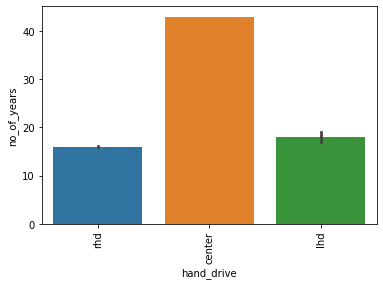

In [77]:
#Plotting bar plot
sns.barplot(x='hand_drive',y='no_of_years',data=data)
plt.xticks(rotation='vertical')
plt.show()

Center hand drive vehicle is the oldest one which is more than 40 years old.

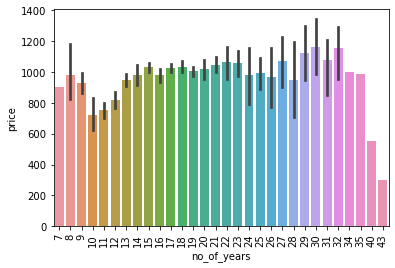

In [78]:
#Plotting bar plot
sns.barplot(x='no_of_years',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see prices of vehicles compared with the no of years.

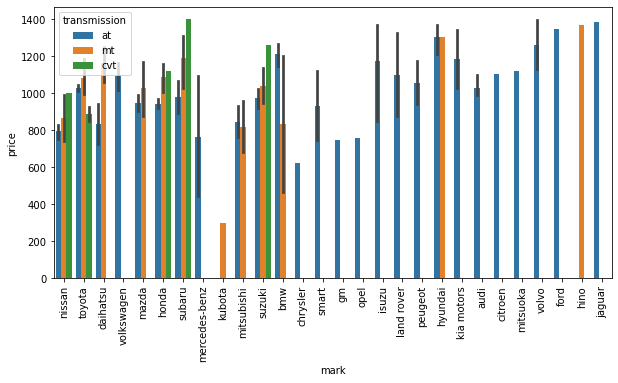

In [79]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='price',hue='transmission',data=data)
plt.xticks(rotation='vertical')
plt.show()

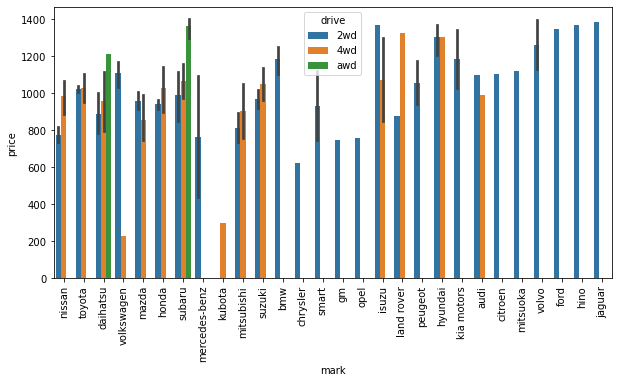

In [80]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='price',hue='drive',data=data)
plt.xticks(rotation='vertical')
plt.show()

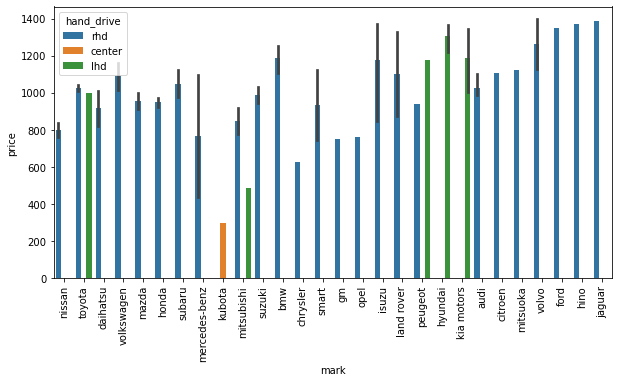

In [81]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='price',hue='hand_drive',data=data)
plt.xticks(rotation='vertical')
plt.show()

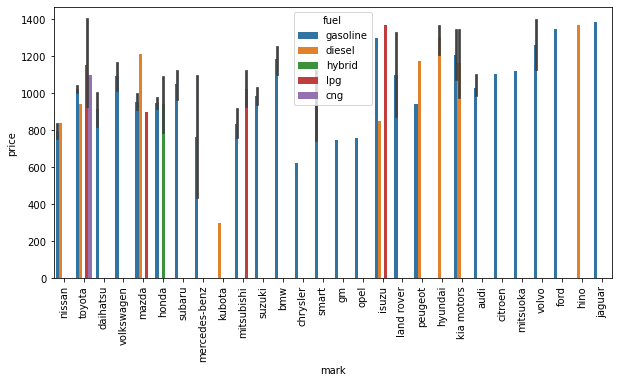

In [82]:
#Plotting bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='mark',y='price',hue='fuel',data=data)
plt.xticks(rotation='vertical')
plt.show()

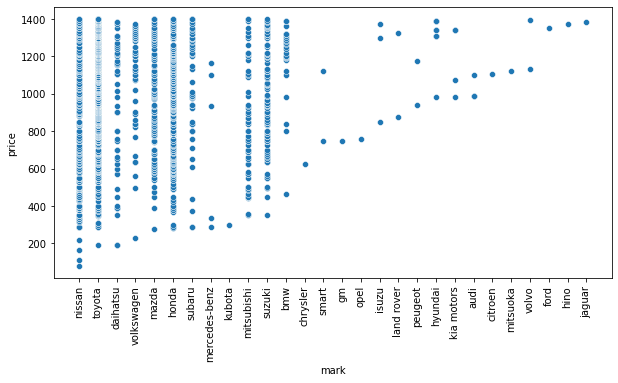

In [83]:
#Plotting Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='mark',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot dats sscattered, we can see that some car brands have the highest prices and some brands have the highest prices as well as lowest prices. So will have to consider other factors also to decide the prices of the vehicles.

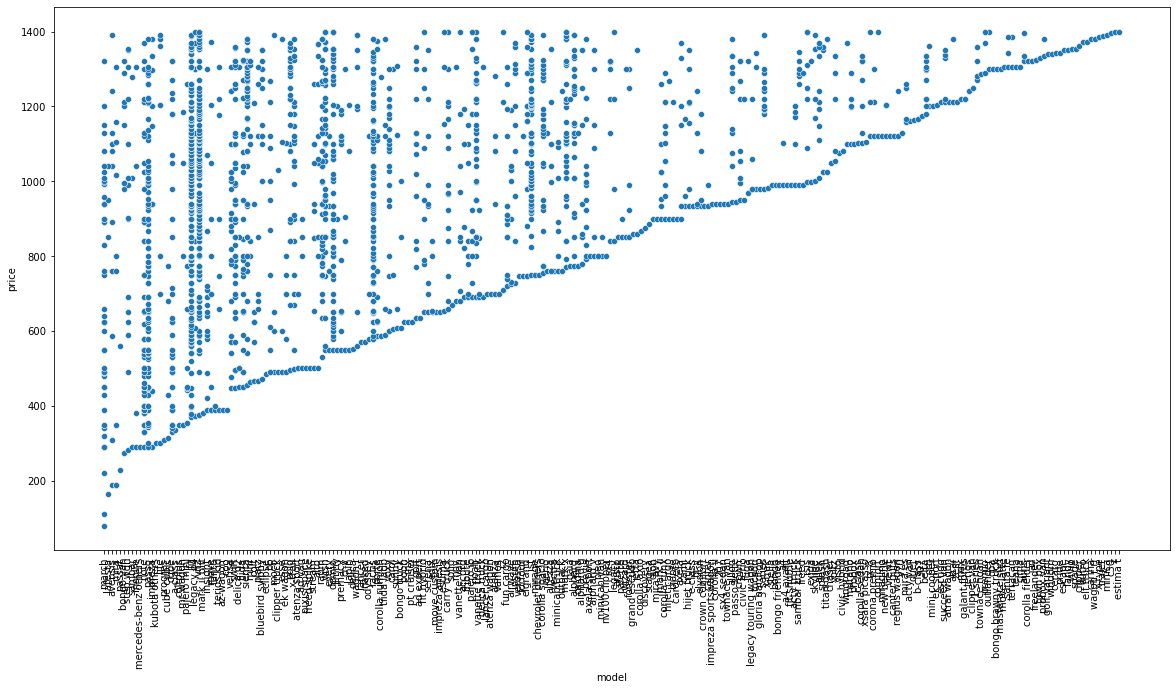

In [84]:
#Plotting Scatter plot
plt.figure(figsize=(20,10))
sns.scatterplot(x='model',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Same for the models, models plays an important role while deciding prices of the vehicle.

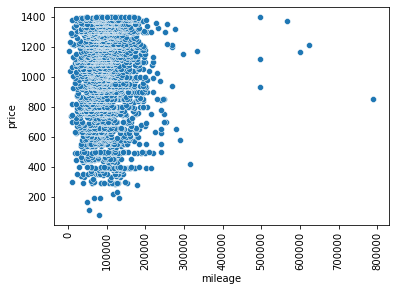

In [85]:
#Plotting Scatter plot
sns.scatterplot(x='mileage',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

So in this we can see that most of the mileage of the vehicle is between 100000 to 300000 and price is also between 200 to 1400. so we cant decide the prices  on the basis of mileage only, we have to ,ook for the other facctors also considering mileage.

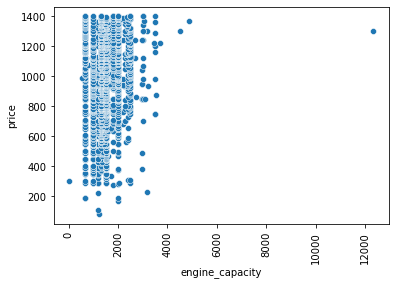

In [86]:
#Plotting Scatter plot
sns.scatterplot(x='engine_capacity',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this most of the vehicles have the engine capacity between 300 too 4000. and prices are aslo from highest to lowest.

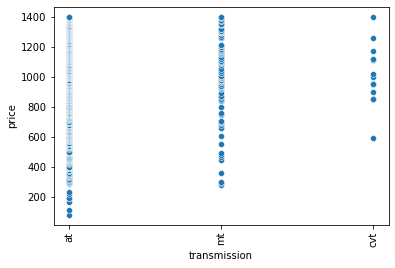

In [87]:
#Plotting Scatter plot
sns.scatterplot(x='transmission',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this we can see that vehicles with cvt gear type have the prices between 500 to 1400, 'at' have the prices from lowest to highest and for 'mt' from 300 to 1400.

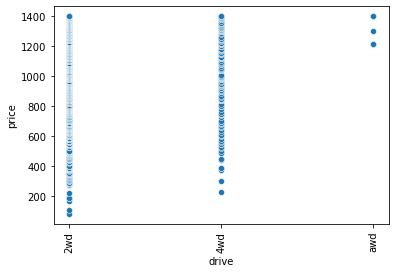

In [88]:
#Plotting Scatter plot
sns.scatterplot(x='drive',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Automatic drive vehicles have prices between 1100 to 1400, 4 wheel drive vehicle have the prices between 300 to 1400 and 2 wheel drive have the prices from lowest to highest.

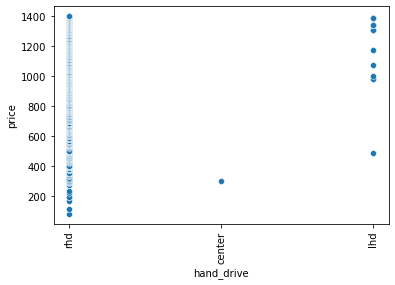

In [89]:
#Plotting Scatter plot
sns.scatterplot(x='hand_drive',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Right hand drive vehicle have the prices from lowest to highest, centre drive vehicle have the prices between 200 to 400 and left hand drive vehicle have the prices between 400 to 1400.

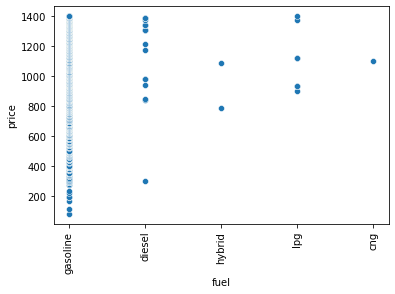

In [90]:
#Plotting Scatter plot
sns.scatterplot(x='fuel',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this also we can see that most of the vehicles have used vehicles and prices are from leat to highest.So only on fuel we cant decide the prices of the vehicles.

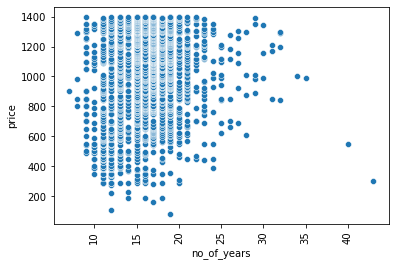

In [91]:
#Plotting Scatter plot
sns.scatterplot(x='no_of_years',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In this plot we can see that we cant really dependent on the no of years to predict the prices, there are other factors which comes to picture, this is because the data is scattered.some of the vehicles which are 11 or 12 year old have less price and some of the vehicles with same age have more price.

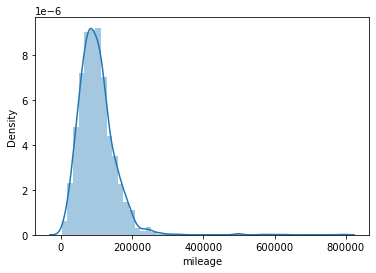

In [92]:
#Plotting distplot for age
sns.distplot(data['mileage'],kde=True)
plt.show()

In this plot we can see the skewness.I will check this while checking skewness and if the skewness is present than than i will treat either by using log trnasformer method or by using power transformer method.

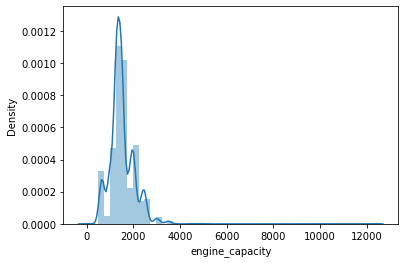

In [93]:
#Plotting distplot for age
sns.distplot(data['engine_capacity'],kde=True)
plt.show()

In this plot also we can see the skewness.I will check this while checking skewness and if the skewness is present than than i will treat either by using log trnasformer method or by using power transformer method.

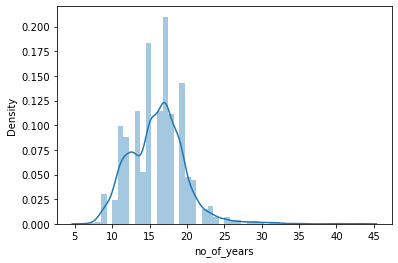

In [94]:
#Plotting distplot for age
sns.distplot(data['no_of_years'],kde=True)
plt.show()

In this plot also we can see the skewness.I will check this while checking skewness and if the skewness is present than than i will treat either by using log trnasformer method or by using power transformer method.

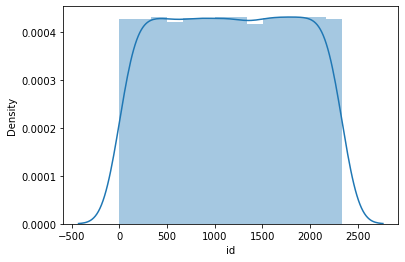

In [95]:
#Plotting distplot for age
sns.distplot(data['id'],kde=True)
plt.show()

In this plot we cannot any skewness.I will check this while checking skewness and if the skewness is present than than i will treat either by using log trnasformer method or by using power transformer method.

In [96]:
#Since column Mark,Model,transmission,drive,hand drive and fuel have  have categorical values so using label encoder to encode
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [97]:
#Encoding column Mark,Model,transmission,drive,hand drive and fuel
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['mark'])
df1=lab_enc.fit_transform(data['model'])
df2=lab_enc.fit_transform(data['transmission'])
df3=lab_enc.fit_transform(data['drive'])
df4=lab_enc.fit_transform(data['hand_drive'])
df5=lab_enc.fit_transform(data['fuel'])

In [98]:
#Transfering data
data['mark']=df
data['model']=df1
data['transmission']=df2
data['drive']=df3
data['hand_drive']=df4
data['fuel']=df5

In [99]:
#Checking whether the data is encoded or not
data.head()

,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
0,0,80,19,143,80000,1240,0,0,2,2,19
1,1,110,19,143,53000,1200,0,0,2,2,12
2,2,165,19,134,47690,2000,0,0,2,2,17
3,3,190,25,29,130661,1990,0,0,2,2,14
4,4,190,4,155,66300,660,0,0,2,2,16


As we can see that the data has been encoded

In [100]:
#Checking correlation
data.corr()

,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
id,1.000000,0.985100,0.089661,-0.047147,0.028091,0.169773,0.041417,0.046394,-0.047754,-0.021589,0.188326
price,0.985100,1.000000,0.090245,-0.041376,0.021581,0.173748,0.043679,0.046591,-0.036473,-0.016337,0.211092
mark,0.089661,0.090245,1.000000,0.314685,-0.077914,0.093752,-0.055845,-0.038483,0.085887,0.039038,0.021472
model,-0.047147,-0.041376,0.314685,1.000000,-0.050820,-0.125296,-0.041309,0.005332,-0.029706,-0.089103,-0.107715
mileage,0.028091,0.021581,-0.077914,-0.050820,1.000000,0.130362,0.042584,0.116351,-0.001168,0.078913,-0.086065
engine_capacity,0.169773,0.173748,0.093752,-0.125296,0.130362,1.000000,-0.146307,0.055608,-0.039517,-0.013111,0.142460
transmission,0.041417,0.043679,-0.055845,-0.041309,0.042584,-0.146307,1.000000,0.248651,-0.040974,-0.074013,0.328114
drive,0.046394,0.046591,-0.038483,0.005332,0.116351,0.055608,0.248651,1.000000,-0.023037,-0.036320,0.241064
hand_drive,-0.047754,-0.036473,0.085887,-0.029706,-0.001168,-0.039517,-0.040974,-0.023037,1.000000,0.434709,-0.107760
fuel,-0.021589,-0.016337,0.039038,-0.089103,0.078913,-0.013111,-0.074013,-0.036320,0.434709,1.000000,-0.007703


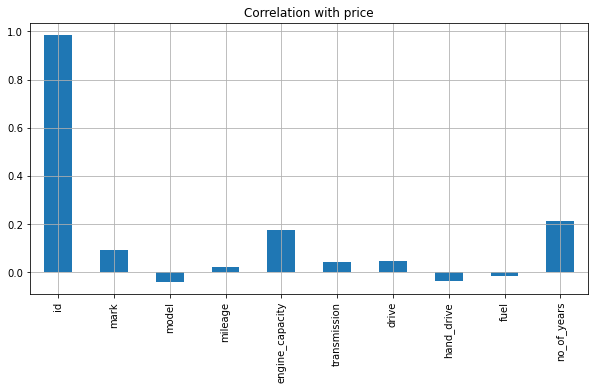

In [101]:
#Plotting correlation
data.drop(['price'],axis=1).corrwith(data['price']).plot(kind='bar',grid=True,figsize=(10,5),title='Correlation with price')
plt.show()

In this we can see that id is highly correlated with the price followed by no of years and  engine_capacity and fuel is the least correlated with the price.

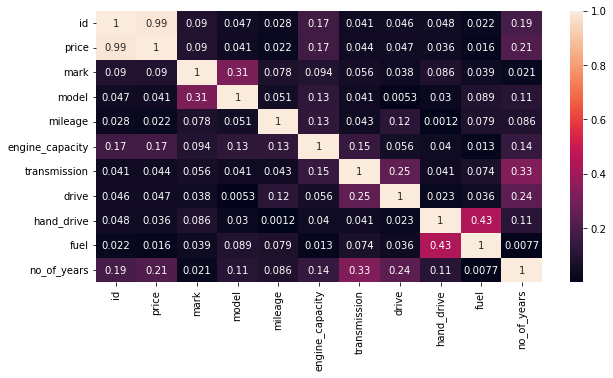

In [102]:
#Plotting Heatmap
corr=data.corr().abs()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)
plt.show()

By looking at the plot its looks like multicollinearity is not present.

In [103]:
#Checking skewness
data.skew()

id                 -0.002276
price              -0.466780
mark               -0.947938
model              -0.267060
mileage             3.089142
engine_capacity     4.038892
transmission        3.820441
drive               3.193137
hand_drive        -12.811470
fuel                4.146744
no_of_years         0.845917
dtype: float64

As we know that we only check for the skewness of the continuous data and features, so in will check the skewness for mileage,engine capacity and no of years. So its come to our notice that all of the three that is mileage, engine capacity and no 0f years have skewness.So will be treating there skewness.

In [104]:
#Transforming the data of mileage,engine capacity and no_of_years using power transform method to remove skewness
#Importing required libraries
from sklearn.preprocessing import power_transform

In [105]:
data[['mileage','engine_capacity','no_of_years']]=power_transform(data[['mileage','engine_capacity','no_of_years']],method='yeo-johnson')
data[['mileage','engine_capacity','no_of_years']]

,mileage,engine_capacity,no_of_years
0,-0.274675,-0.442068,0.850274
1,-1.001101,-0.532980,-1.141661
2,-1.171672,0.992741,0.351097
3,0.733433,0.976578,-0.494230
4,-0.618608,-2.039570,0.083585
...,...,...,...
2313,0.564364,-1.032561,-0.808115
2314,0.183561,2.386109,0.850274
2315,0.183561,-2.039570,0.351097
2316,1.347079,-2.039570,1.524764


In [106]:
#Checking skewness
data.skew()

id                 -0.002276
price              -0.466780
mark               -0.947938
model              -0.267060
mileage             0.101598
engine_capacity     0.154166
transmission        3.820441
drive               3.193137
hand_drive        -12.811470
fuel                4.146744
no_of_years         0.005415
dtype: float64

So we can see that now the skewness of the fare is between 0.5 to -0.5. so that means skewness have been removed from column mileage,engine capacity and no_of_years.

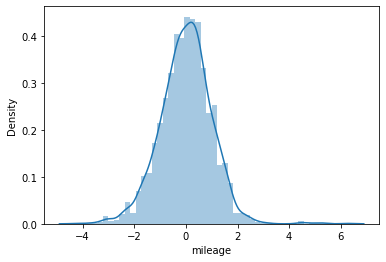

In [107]:
#Plotting distplot for mileage
sns.distplot(data['mileage'],kde=True)
plt.show()

As we can see the normal distribution that means the skewness have been removed.

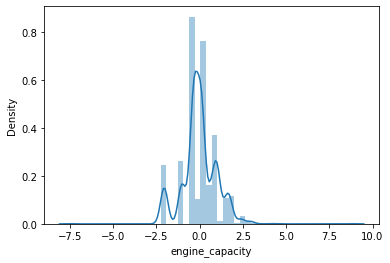

In [108]:
#Plotting distplot for engine capacity
sns.distplot(data['engine_capacity'],kde=True)
plt.show()

As we can see the normal distribution that means the skewness have been removed.

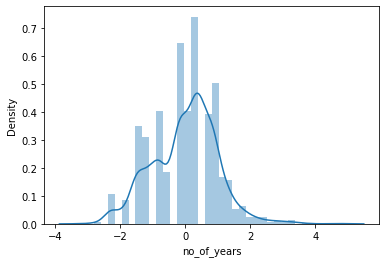

In [109]:
#Plotting distplot for no of years
sns.distplot(data['no_of_years'],kde=True)
plt.show()

As we can see the normal distribution that means the skewness have been removed.

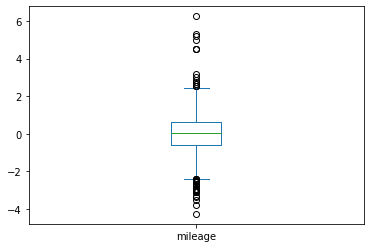

In [110]:
#Checking for outliers in mileage
data['mileage'].plot.box()
plt.show()

By looking at the plot we can see that lot of outliers are present.

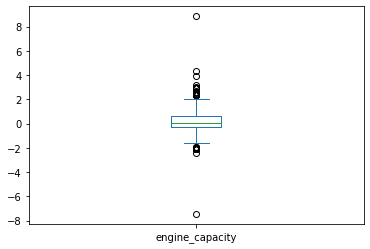

In [111]:
#Checking for outliers in engine capacity
data['engine_capacity'].plot.box()
plt.show()

By looking at the plot we can see that lot of outliers are present.

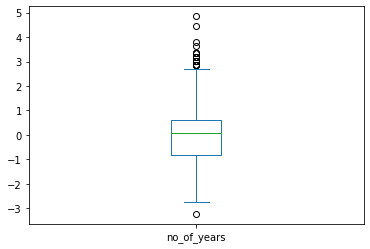

In [112]:
#Checking for outliers in no of years
data['no_of_years'].plot.box()
plt.show()

By looking at the plot we can see that lot of outliers are present.

In [113]:
#Removing outliers
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [114]:
#Finding the value of mileage from where outliers starts
mileage_high=q3.mileage+(1.5*iqr.mileage)
mileage_high

2.444404742516281

In [115]:
#Checking and location how many of the outliers are present
mileage=np.where(data['mileage']>mileage_high)
mileage

(array([ 103,  268,  359,  811,  971, 1001, 1459, 1572, 1587, 1609, 1668,
        1713, 1729, 2070, 2210, 2310], dtype=int64),)

In [116]:
#Dropping the index which we found as outliers
data=data.drop(data.index[mileage])
data.shape

(2302, 11)

In [117]:
#Reseting the index
data.reset_index()

,index,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
0,0,0,80,19,143,-0.274675,-0.442068,0,0,2,2,0.850274
1,1,1,110,19,143,-1.001101,-0.532980,0,0,2,2,-1.141661
2,2,2,165,19,134,-1.171672,0.992741,0,0,2,2,0.351097
3,3,3,190,25,29,0.733433,0.976578,0,0,2,2,-0.494230
4,4,4,190,4,155,-0.618608,-2.039570,0,0,2,2,0.083585
...,...,...,...,...,...,...,...,...,...,...,...,...
2297,2313,2331,1400,25,242,0.564364,-1.032561,0,0,2,2,-0.808115
2298,2314,2332,1400,25,100,0.183561,2.386109,0,0,2,2,0.850274
2299,2315,2333,1400,23,195,0.183561,-2.039570,1,0,2,2,0.351097
2300,2316,2334,1400,8,256,1.347079,-2.039570,0,1,2,2,1.524764


In [118]:
#Finding the value of mileage from where outliers starts
mileage_low=q1.mileage-(1.5*iqr.mileage)
mileage_low

-2.4265586208473366

In [119]:
#Checking and location how many of the outliers are present
mileage=np.where(data['mileage']<mileage_low)
mileage

(array([  23,  162,  348,  446,  490,  496,  699,  936, 1044, 1053, 1122,
        1159, 1220, 1297, 1348, 1475, 1518, 1597, 1705, 1734, 1750, 1784,
        1907, 1918, 1921, 2100, 2216, 2219, 2245], dtype=int64),)

In [120]:
#Dropping the index which we found as outliers
data=data.drop(data.index[mileage])
data.shape

(2273, 11)

In [121]:
#Reseting the index
data.reset_index()

,index,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
0,0,0,80,19,143,-0.274675,-0.442068,0,0,2,2,0.850274
1,1,1,110,19,143,-1.001101,-0.532980,0,0,2,2,-1.141661
2,2,2,165,19,134,-1.171672,0.992741,0,0,2,2,0.351097
3,3,3,190,25,29,0.733433,0.976578,0,0,2,2,-0.494230
4,4,4,190,4,155,-0.618608,-2.039570,0,0,2,2,0.083585
...,...,...,...,...,...,...,...,...,...,...,...,...
2268,2313,2331,1400,25,242,0.564364,-1.032561,0,0,2,2,-0.808115
2269,2314,2332,1400,25,100,0.183561,2.386109,0,0,2,2,0.850274
2270,2315,2333,1400,23,195,0.183561,-2.039570,1,0,2,2,0.351097
2271,2316,2334,1400,8,256,1.347079,-2.039570,0,1,2,2,1.524764


In [122]:
#Finding the value of engine capacity from where outliers starts
engine_capacity_high=q3.engine_capacity+(1.5*iqr.engine_capacity)
engine_capacity_high

2.109581669310924

In [123]:
#Checking and location how many of the outliers are present
engine_capacity=np.where(data['engine_capacity']>engine_capacity_high)
engine_capacity

(array([   7,   57,  144,  449,  498,  499,  741,  742,  743,  746,  807,
         831,  946, 1006, 1030, 1066, 1068, 1237, 1430, 1557, 1641, 1643,
        1738, 1745, 1794, 1802, 1904, 1946, 1988, 1999, 2002, 2003, 2087,
        2148, 2172, 2262, 2269, 2272], dtype=int64),)

In [124]:
#Dropping the index which we found as outliers
data=data.drop(data.index[engine_capacity])
data.shape

(2235, 11)

In [125]:
#Reseting the index
data.reset_index()

,index,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
0,0,0,80,19,143,-0.274675,-0.442068,0,0,2,2,0.850274
1,1,1,110,19,143,-1.001101,-0.532980,0,0,2,2,-1.141661
2,2,2,165,19,134,-1.171672,0.992741,0,0,2,2,0.351097
3,3,3,190,25,29,0.733433,0.976578,0,0,2,2,-0.494230
4,4,4,190,4,155,-0.618608,-2.039570,0,0,2,2,0.083585
...,...,...,...,...,...,...,...,...,...,...,...,...
2230,2311,2329,1400,25,250,0.201200,0.992741,0,0,2,2,0.351097
2231,2312,2330,1400,15,84,0.398611,-0.309434,0,0,2,2,-0.197647
2232,2313,2331,1400,25,242,0.564364,-1.032561,0,0,2,2,-0.808115
2233,2315,2333,1400,23,195,0.183561,-2.039570,1,0,2,2,0.351097


In [126]:
#Finding the value of no of years from where outliers starts
no_of_years_high=q3.no_of_years+(1.5*iqr.no_of_years)
no_of_years_high

2.727842572632704

In [127]:
#Checking and location how many of the outliers are present
no_of_years=np.where(data['no_of_years']>no_of_years_high)
no_of_years

(array([ 243,  724,  734,  839, 1058, 1092, 1126, 1137, 1532, 1560, 1631,
        1652, 1877, 1917, 2062, 2102, 2198], dtype=int64),)

In [128]:
#Dropping the index which we found as outliers
data=data.drop(data.index[no_of_years])
data.shape

(2218, 11)

In [129]:
#Reseting the index
data.reset_index()

,index,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
0,0,0,80,19,143,-0.274675,-0.442068,0,0,2,2,0.850274
1,1,1,110,19,143,-1.001101,-0.532980,0,0,2,2,-1.141661
2,2,2,165,19,134,-1.171672,0.992741,0,0,2,2,0.351097
3,3,3,190,25,29,0.733433,0.976578,0,0,2,2,-0.494230
4,4,4,190,4,155,-0.618608,-2.039570,0,0,2,2,0.083585
...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2311,2329,1400,25,250,0.201200,0.992741,0,0,2,2,0.351097
2214,2312,2330,1400,15,84,0.398611,-0.309434,0,0,2,2,-0.197647
2215,2313,2331,1400,25,242,0.564364,-1.032561,0,0,2,2,-0.808115
2216,2315,2333,1400,23,195,0.183561,-2.039570,1,0,2,2,0.351097


In [130]:
#Finding the value of no of years from where outliers starts
no_of_years_low=q1.no_of_years-(1.5*iqr.no_of_years)
no_of_years_low

-2.9296891836069574

In [131]:
#Checking and location how many of the outliers are present
no_of_years=np.where(data['no_of_years']<no_of_years_low)
no_of_years

(array([859], dtype=int64),)

In [132]:
#Dropping the index which we found as outliers
data=data.drop(data.index[no_of_years])
data.shape

(2217, 11)

In [133]:
#Reseting the index
data.reset_index()

,index,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_of_years
0,0,0,80,19,143,-0.274675,-0.442068,0,0,2,2,0.850274
1,1,1,110,19,143,-1.001101,-0.532980,0,0,2,2,-1.141661
2,2,2,165,19,134,-1.171672,0.992741,0,0,2,2,0.351097
3,3,3,190,25,29,0.733433,0.976578,0,0,2,2,-0.494230
4,4,4,190,4,155,-0.618608,-2.039570,0,0,2,2,0.083585
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2311,2329,1400,25,250,0.201200,0.992741,0,0,2,2,0.351097
2213,2312,2330,1400,15,84,0.398611,-0.309434,0,0,2,2,-0.197647
2214,2313,2331,1400,25,242,0.564364,-1.032561,0,0,2,2,-0.808115
2215,2315,2333,1400,23,195,0.183561,-2.039570,1,0,2,2,0.351097


So we can that the number of columns have been reduced that means the outliers have been removed.

In [134]:
#Percentage Loss of Data
data_loss=((2318-2217)/2318)*100
print(f'Data Loss:{data_loss} %')

Data Loss:4.357204486626403 %


So we can see that the data loss is about 4.35%.

* **I am not using feature selection cause already the the features are very less and i find each and every feature related to the label cause to preedict a price each feature a playing a important role logically.That is why i want each and every column and that why i am nit using feature selection method.**

In [135]:
#Dividing dataset into features and label
#Features
x=data.drop(['price'],axis=1)
#Label
y=data['price']

Most of the data is categorical which is encoded, so there is no use to standardize that data and about continuous data, i have used power transformer to remove the skewness, and when we are using power transformer there is no need to standardize the data, hence i am not using standard scaler to standardize the data.

In [136]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Gradient Boosting

In [137]:
#Initiating Gradient Boosting Regression
gb=GradientBoostingRegressor()

In [138]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    gb.fit(x_train,y_train)
    pred=gb.predict(x_train)
    y_pred=gb.predict(x_test)
    print(f'at random state {i}, training accuracy is {metrics.r2_score(y_train,pred)*100}')
    print(f'at random state {i}, testing accuracy is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

at random state 0, training accuracy is 99.99855394114981
at random state 0, testing accuracy is 99.98761295145135


at random state 1, training accuracy is 99.99837744562969
at random state 1, testing accuracy is 99.98710914972779


at random state 2, training accuracy is 99.99866161183294
at random state 2, testing accuracy is 99.96784608410867


at random state 3, training accuracy is 99.99841083873415
at random state 3, testing accuracy is 99.99330993354167


at random state 4, training accuracy is 99.99846095706786
at random state 4, testing accuracy is 99.99539063141222


at random state 5, training accuracy is 99.99865200938571
at random state 5, testing accuracy is 99.99304216305123


at random state 6, training accuracy is 99.99855491515895
at random state 6, testing accuracy is 99.99187456570371


at random state 7, training accuracy is 99.99828674032747
at random state 7, testing accuracy is 99.98808672585396


at random state 8, training accuracy is 99.99844614373143
at ran

Taking the random state=17

In [157]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=17)

In [158]:
#Training the Model
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [159]:
pred=gb.predict(x_train)
y_pred=gb.predict(x_test)

In [160]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.99827880442369

 Testing Score: 99.98663920144276


In [161]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [162]:
#Checking cross validation score for Gradient Boosting
for j in range(2,6):
    cv_score=cross_val_score(gb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is -2.7053097458473703and accuracy for the testing is 0.9998663920144275


at cross fold 3 the cv score is -1.8541110564904653and accuracy for the testing is 0.9998663920144275


at cross fold 4 the cv score is -1.2672727441704201and accuracy for the testing is 0.9998663920144275


at cross fold 5 the cv score is -1.0687381512655467and accuracy for the testing is 0.9998663920144275




In [163]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

1.1453419194674512

In [164]:
#mean squared error
mean_squared_error(y_test,y_pred)

11.654756523417284

In [165]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

3.413906343679815

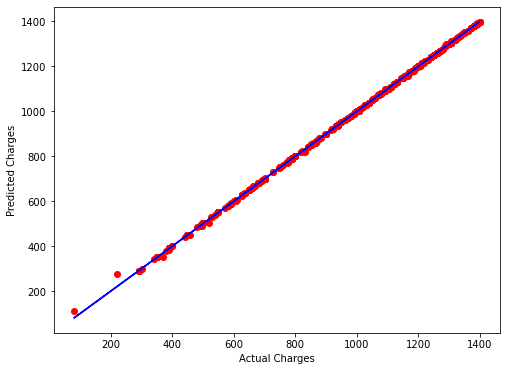

In [166]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

# Random Forest

In [167]:
#Instantiating Random Forest
rf=RandomForestRegressor()

In [168]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=77)

In [169]:
#Training the Model
rf.fit(x_train,y_train)

RandomForestRegressor()

In [170]:
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [171]:
#Printing Training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.99843144400981

 Testing score: 99.99790021675382


In [172]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [173]:
#Checking cross validation score for Random Forest
for j in range(2,6):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is -2.701167628632304and accuracy for the testing is 0.9999790021675382


at cross fold 3 the cv score is -1.8557509543863422and accuracy for the testing is 0.9999790021675382


at cross fold 4 the cv score is -1.259683410617424and accuracy for the testing is 0.9999790021675382


at cross fold 5 the cv score is -1.1075898471458359and accuracy for the testing is 0.9999790021675382




In [174]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.5833513513513474

In [175]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

1.7720061261261308

In [176]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

1.3311672044210414

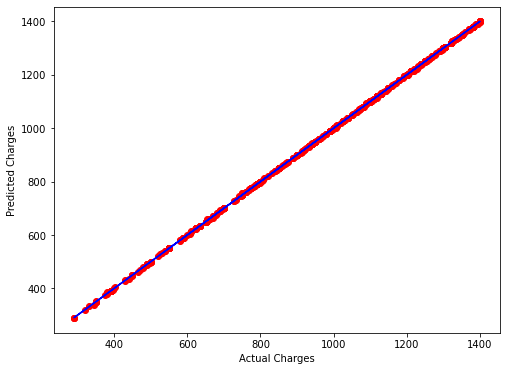

In [177]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

# Ada Boost

In [178]:
#Instantiating Ada Boost Regressor
ada=AdaBoostRegressor()

In [179]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=77)

In [180]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [181]:
pred=ada.predict(x_train)
y_pred=ada.predict(x_test)

In [182]:
#Printing Training and Testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.55130153288559

 Testing Score: 99.56157931020944


In [183]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [184]:
#Checking cross validation score for Ada Boost
for j in range(2,6):
    cv_score=cross_val_score(ada,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is -3.4260354645298383and accuracy for the testing is 0.9956157931020944


at cross fold 3 the cv score is -3.367206205442656and accuracy for the testing is 0.9956157931020944


at cross fold 4 the cv score is -3.3440516447244852and accuracy for the testing is 0.9956157931020944


at cross fold 5 the cv score is -3.692858842437361and accuracy for the testing is 0.9956157931020944




In [185]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

14.834962108625145

In [186]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

369.98302064902884

In [187]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

19.234942699395514

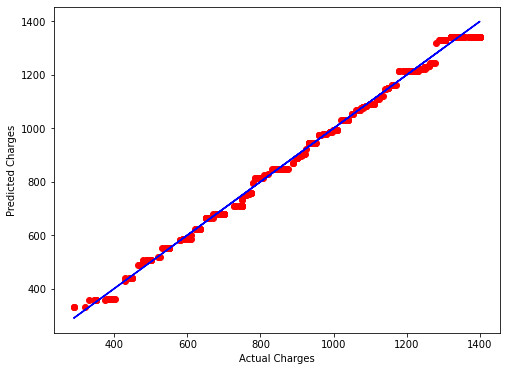

In [188]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

# XGBoost

In [189]:
#Instantiating XGBoost
xgb=xgb.XGBRegressor()

In [190]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=77)

In [191]:
#Training data
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [192]:
pred=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [193]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.99989376374097

 Testing Score: 99.99472618766455


In [194]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [195]:
#Checking cross validation score for XGBoost
for j in range(2,6):
    cv_score=cross_val_score(xgb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is -2.701214414633485and accuracy for the testing is 0.9999472618766455


at cross fold 3 the cv score is -1.850059060916587and accuracy for the testing is 0.9999472618766455


at cross fold 4 the cv score is -1.2769648434529803and accuracy for the testing is 0.9999472618766455


at cross fold 5 the cv score is -1.103458383354011and accuracy for the testing is 0.9999472618766455




In [196]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.9942676441089527

In [197]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

4.450567830491576

In [198]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

2.1096368954138947

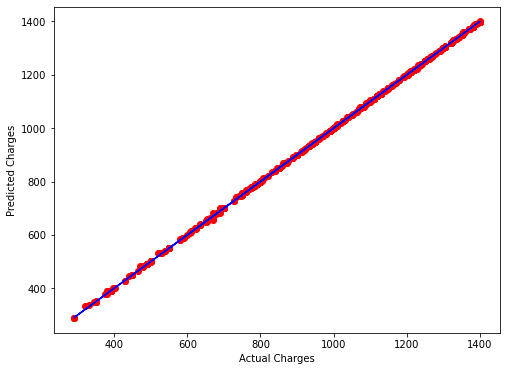

In [199]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

In [200]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Gradient Boosting','Random forest','Ada Boost','XGBoost'],
    'Training Score':[99.99,99.99,99.52,99.99],
    'Testing Score':[99.98,99.99,99.56,99.99],
    'RMSE':[3.40,1.30,19.19,2.10]
})
data

,Models,Training Score,Testing Score,RMSE
0,Gradient Boosting,99.99,99.98,3.40
1,Random forest,99.99,99.99,1.30
2,Ada Boost,99.52,99.56,19.19
3,XGBoost,99.99,99.99,2.10


**Observation**
* **Testing score of all the models are good but the Root Mean squared error of Random Forest is very less.Hence i am going with Random Forest Classifier**

In [201]:
#Using Grid Search cv for hyperparameter tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV

In [202]:
param_grid=({
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
})

In [203]:
grid_search=GridSearchCV(rf,param_grid=param_grid,cv=5)

In [204]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [205]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [206]:
#Training with the best parameters
rf=RandomForestRegressor(criterion='mae',max_depth=8,max_features='auto',n_estimators=500)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=8, max_features='auto',
                      n_estimators=500)

In [207]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.99989376374097

 Testing Score: 99.99472618766455


In [208]:
#Cross validation SCore
cv_score=cross_val_score(rf,x,y,cv=5).mean()
cv_score

-1.1130782085622435

In [209]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rf,open('Japan used car project','wb'))